In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [6]:
df = pd.read_csv('/content/marketing_campaign.csv', sep='\t')
print("Loaded:", df.shape)
print(df.head())
print(df.info())

Loaded: (2240, 29)
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain

In [7]:
# Remove impossible or missing income
df = df[df["Income"].notna() & (df["Income"] > 0)]

In [8]:
# We will use numeric spend/purchase features only
num_cols = [
    "Income",
    "MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds",
    "NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases",
    "Recency","NumWebVisitsMonth"
]

data = df[num_cols].copy()

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(data)

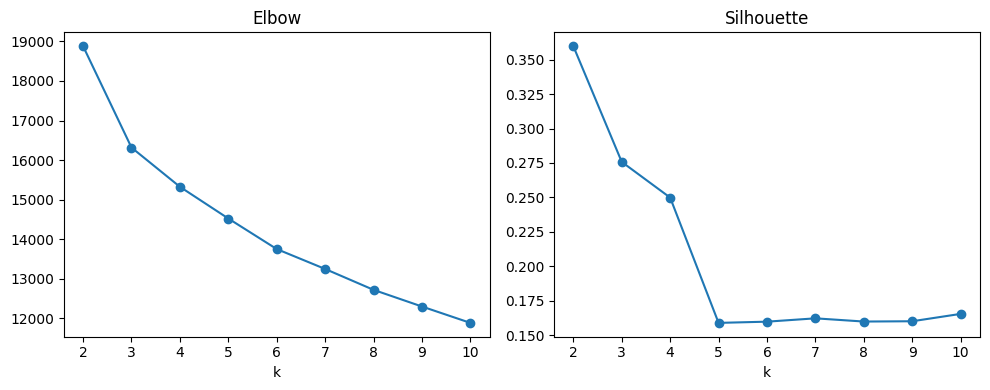

In [10]:
def test_k(X):
    distortions=[]; sil=[]
    Ks = range(2,11)
    for k in Ks:
        km = KMeans(n_clusters=k,n_init=20,random_state=42)
        labels = km.fit_predict(X)
        distortions.append(km.inertia_)
        sil.append(silhouette_score(X, labels))
    return Ks, distortions, sil

Ks, distortions, sil = test_k(X)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(Ks,distortions,'o-')
plt.title("Elbow")
plt.xlabel("k")

plt.subplot(1,2,2)
plt.plot(Ks,sil,'o-')
plt.title("Silhouette")
plt.xlabel("k")

plt.tight_layout()
plt.show()


In [11]:
k = 4
kmeans = KMeans(n_clusters=k,n_init=50,random_state=42)
df["cluster"] = kmeans.fit_predict(X)


In [12]:
summary = df.groupby("cluster")[num_cols].mean().round(2)
print(summary)

           Income  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
cluster                                                                    
0        34857.07     38.62       4.69            20.58             6.97   
1        67515.98    611.47      33.26           232.47            44.86   
2        78609.63    566.68      82.38           504.88           118.61   
3        49540.19    331.10      12.47            95.17            19.63   

         MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
cluster                                                                       
0                    4.96         14.46               1.86             1.98   
1                   35.28         58.33               2.08             6.01   
2                   81.98         87.63               1.37             5.02   
3                   13.67         57.31               5.19             6.36   

         NumCatalogPurchases  NumStorePurchases  Recency  NumWebVisi

In [13]:
pca = PCA(n_components=2)
proj = pca.fit_transform(X)

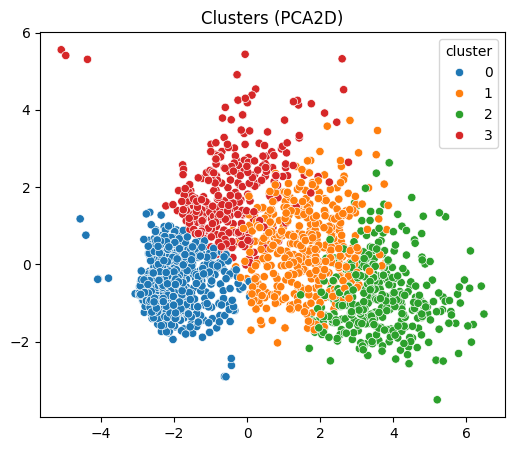

In [14]:
plt.figure(figsize=(6,5))
sns.scatterplot(x=proj[:,0],y=proj[:,1],hue=df["cluster"],palette="tab10")
plt.title("Clusters (PCA2D)")
plt.show()

In [15]:
df.to_csv("customers_with_clusters.csv",index=False)
print("Saved customers_with_clusters.csv")

Saved customers_with_clusters.csv
